#### PCA applied to postions of face


In [1]:
from modules.loaders import LoadDataset
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
dataset = LoadDataset('positions_Faces_GERARDO.h5').load_h5()
type(dataset)

h5py._hl.files.File

In [3]:
with dataset as h5file:
    data_h5 = []
    labels = []
    for face in h5file.keys():
        positions = h5file[face]['positions'][:]
        data_h5.append(positions)
        # print(positions.shape)
        labels.extend([face]*positions.shape[1]) #* extend is used to add the elements of the list, not the list itself  

labels = np.array(labels)
labels_letter = np.reshape(labels, (labels.shape[0], ))
labels_letter.shape


(6000,)

In [4]:
for i, id in enumerate(data_h5):
    print('Data shape',i, id.shape)
n_data = id.shape[1]

Data shape 0 (936, 1200)
Data shape 1 (936, 1200)
Data shape 2 (936, 1200)
Data shape 3 (936, 1200)
Data shape 4 (936, 1200)


In [5]:
labels_letter

array(['ENOJO', 'ENOJO', 'ENOJO', ..., 'TRISTE', 'TRISTE', 'TRISTE'],
      dtype='<U8')

In [6]:
data = np.concatenate(data_h5,axis=1)
data.shape

(936, 6000)

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

normalized_data = scaler.fit_transform(data)

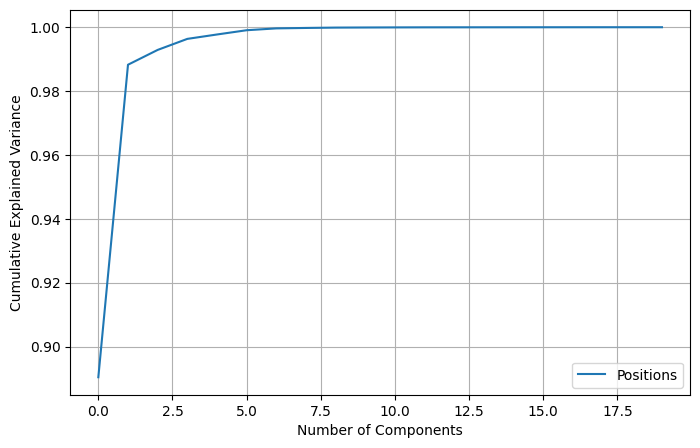

In [8]:
from sklearn.decomposition import PCA

### Reduce dimensions of positions (936)
pca_positions = PCA().fit(normalized_data.T) # Fit PCA to data
# print("Explained variance (positions):", pca_positions.explained_variance_ratio_)

# Plot cumulative explained variance (
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_positions.explained_variance_ratio_[0:20]), label='Positions')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid()
plt.show()


In [9]:
pca_positions_sum = np.cumsum(pca_positions.explained_variance_ratio_)


In [10]:
np.where((pca_positions_sum > 0.95) & (pca_positions_sum < 1))

### 

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

###  If the cumulative explained variance is close to 1.0 from the first few principal components (i.e., a small number of components explain almost all the variance), this indicates that your data has high redundancy or that the positions are highly correlated with each other. This is an interesting scenario and has several implications

In [11]:
from sklearn.decomposition import PCA


# Fit PCA and reduce the dimensionality
pca = PCA(n_components=1)
reduced_data = pca.fit_transform(normalized_data.T)

# Recover the original data (or an approximation) using the same PCA object
recovered_data = pca.inverse_transform(reduced_data)

# Print the shape of the reduced and recovered data
print(f"Shape of reduced data: {reduced_data.shape}")
print(f"Shape of recovered data: {recovered_data.shape}")


Shape of reduced data: (6000, 1)
Shape of recovered data: (6000, 936)


In [12]:
valeus = pca.explained_variance_ratio_
valeus

array([0.89039458])

In [13]:
vectors = pca.components_  # Shape: (3, 936)
#### Let's print the first 3 components
top_features_list = []
n_features = 100 # Number of features to show


for i in range(vectors.shape[0]):  # For each component
    print(f"Componente {i+1}:")
    
    
    top_features = np.argsort(np.abs(vectors[i]))[::-1]  # Sort the features by their absolute value
    #### Minus sign to sort in descending order
    
    # Save the top 10 features
    top_features_list.append(top_features[:n_features].tolist())
    
    for j in top_features[:n_features]:  # Show the top 10 features
        print(f"Feature {j}: {vectors[i, j]}")
    print("\n")

print("Top 10 positions:")
print(top_features_list)

Componente 1:
Feature 127: 0.03445109221401622
Feature 234: 0.0344198151155084
Feature 162: 0.03440392712286026
Feature 93: 0.034374430865764756
Feature 34: 0.03433769240244832
Feature 227: 0.034321212485534325
Feature 132: 0.034306848448477915
Feature 485: -0.03429799432292188
Feature 667: -0.034295624351705835
Feature 21: 0.03428924540280848
Feature 782: -0.034288908567777505
Feature 137: 0.03427524182750153
Feature 643: -0.03427483937053149
Feature 896: -0.03425739350410919
Feature 139: 0.034253358984819876
Feature 484: -0.034252486182554276
Feature 864: -0.03424923106454998
Feature 783: -0.03424008770000413
Feature 668: -0.03422940957746017
Feature 552: -0.034219082502989925
Feature 177: 0.034211242209024384
Feature 889: -0.034204067065959715
Feature 479: -0.03418461468961913
Feature 486: -0.03418066816555853
Feature 873: -0.0341782500534816
Feature 58: 0.03417766535903005
Feature 781: -0.03417527241046743
Feature 553: -0.03417374292064274
Feature 676: -0.03416658819321503
Feature 

In [14]:
import itertools
top_features_list = list(itertools.chain(*top_features_list))  # concatenate lists
print(len(top_features_list))

100


In [15]:
top_features_list.sort()  


In [16]:
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_array = np.array(top_features_list)
top_features_list =   top_features_list +  [ x+1 if x%2 == 0 else x-1 for x in top_features_array]  # Add the previous and next index  
# if -1 or 936 in top_features_list:
#     try:
#         top_features_list.remove(-1)
#         top_features_list.remove(0)
#         top_features_list.remove(1)
#     except:
#         print('There is no zero')
#     try:
#         top_features_list.remove(936)
#         top_features_list.remove(935)
#         top_features_list.remove(934)
#     except:
#         print('There is no 935')
# top_features_list = top_features_list + (np.array(top_features_list) - 1).tolist()  # Add the previous and next index
top_features_list = list(set(top_features_list))  # Delete duplicates
top_features_list.sort()  # Sort the list
top_features_list

[20,
 21,
 34,
 35,
 54,
 55,
 58,
 59,
 68,
 69,
 70,
 71,
 92,
 93,
 110,
 111,
 116,
 117,
 122,
 123,
 124,
 125,
 126,
 127,
 132,
 133,
 136,
 137,
 138,
 139,
 142,
 143,
 146,
 147,
 156,
 157,
 162,
 163,
 172,
 173,
 176,
 177,
 212,
 213,
 214,
 215,
 226,
 227,
 234,
 235,
 468,
 469,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 504,
 505,
 506,
 507,
 508,
 509,
 512,
 513,
 540,
 541,
 548,
 549,
 550,
 551,
 552,
 553,
 554,
 555,
 592,
 593,
 616,
 617,
 620,
 621,
 638,
 639,
 642,
 643,
 646,
 647,
 648,
 649,
 650,
 651,
 666,
 667,
 668,
 669,
 676,
 677,
 730,
 731,
 734,
 735,
 736,
 737,
 738,
 739,
 740,
 741,
 742,
 743,
 770,
 771,
 772,
 773,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 822,
 823,
 836,
 837,
 844,
 845,
 864,
 865,
 868,
 869,
 870,
 871,
 872,
 873,
 874,
 875,
 886,
 887,
 888,
 889,
 896,
 897,
 924,
 925,
 928,
 929]

In [17]:
print(len(top_features_list))
data_selected = normalized_data[ top_features_list,:]
print('Top data most relevant:',data_selected.shape)
print('original data:',normalized_data.shape)

156
Top data most relevant: (156, 6000)
original data: (936, 6000)


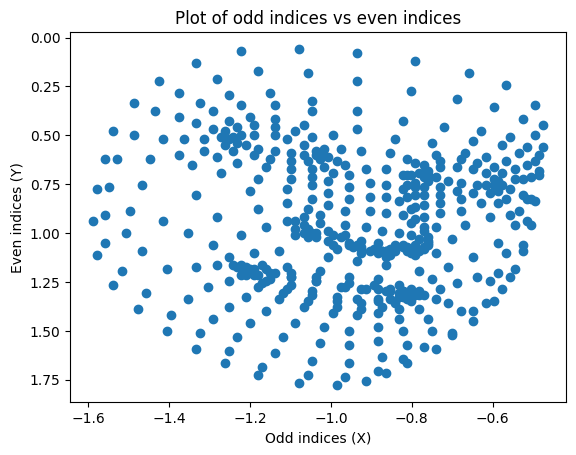

ValueError: x and y must have same first dimension, but have shapes (156,) and (0,)

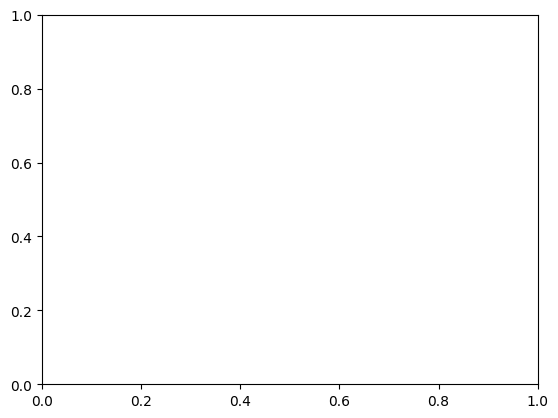

In [20]:
# Plot odd indices in x and even indices in y
face_selected = 2000

plt.plot(normalized_data.T[face_selected, 0:468-1], normalized_data.T[face_selected,468:936-1], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()



# Plot odd indices in x and even indices in y

plt.plot(data_selected.T[face_selected, 0:468-1], data_selected.T[face_selected, 468:936-1], 'o')  # Odd indices (x) and even indices (y)
plt.gca().invert_yaxis()
# Add labels and title for better clarity
plt.xlabel("Odd indices (X)")
plt.ylabel("Even indices (Y)")
plt.title("Plot of odd indices vs even indices")
plt.show()

In [136]:

import h5py
s = os.path.sep
do_it = input('Do you want to save the data? (y/n)')
if do_it == 'y':
    output_file = f'..{os.path.sep}..{os.path.sep}data{os.path.sep}features{os.path.sep}positions_Faces_PCA_v2.h5'

    # Create an HDF5 file and group data by labels
    with h5py.File(output_file, "w") as h5file:
        # Iterate over the labels and the data
        for i, label in enumerate(np.unique(labels_letter)):
            # Filter the positions corresponding to the current label
            group_data = reduced_data[labels_letter == label]
            
            # Transpose the group_data before saving
            data_selected = data[ top_features_list,n_data*i:n_data*(i+1)]  # Select the most relevant features
            
            # Create a group with the name of the label
            grp = h5file.create_group(str(label))
            print(label)
            # Create a dataset inside the group for the transposed positions
            grp.create_dataset('positions', data=data_selected)
        print(f"Data successfully saved to {output_file}")
        
        
    df = pd.DataFrame(top_features_list, columns=["Selected_Features"])

#Save the selected features
    df.to_csv(f'..{s}..{s}data{s}features{s}selected_index_faces_v2.csv', index=False)
else:
    print('Data not saved')



enojado
feliz
neutral
sorpresa
triste
Data successfully saved to ..\..\data\features\positions_Faces_PCA_v2.h5


In [137]:
top_features = pd.read_csv('..\\..\\data\\features\\selected_index_faces.csv' )
top_features['Selected_Features'].to_list() 

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 38,
 39,
 40,
 41,
 42,
 43,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 68,
 69,
 70,
 71,
 74,
 75,
 76,
 77,
 88,
 89,
 90,
 91,
 92,
 93,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 116,
 117,
 118,
 119,
 120,
 121,
 126,
 127,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 158,
 159,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 186,
 187,
 188,
 189,
 194,
 195,
 198,
 199,
 206,
 207,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 217,
 218,
 219,
 222,
 223,
 226,
 227,
 230,
 231,
 232,
 233,
 234,
 235,
 246,
 247,
 248,
 249,
 250,
 251,
 254,
 255,
 262,
 263,
 264,
 265,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 286,
 287,
 294,
 295,
 296,
 297,
 298,
 299,
 300,
 301,
 302,
 303,
 304,
